In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import odeint
import scipy.special as special
import math

In [37]:
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 100

# Метод вырожденных Ядер

Решим уравнение 11.3 пункт б методом вырожденых ядер

Разложим ядро: $x(e^{xs} - 1) = x (1 + xs +\ ... \ +O(x^N) - 1)$

In [126]:
a = 0
b = 1
h = (b - a)/20
Lambda = -1
x = np.arange(a, b, h)
x = x.reshape(len(x), 1)
n = len(x)

In [127]:
N = 10
alpha = lambda t: [t**(i+2) for i in range(N)]
beta = lambda t: [t**(i+1)/np.math.factorial(i+1) for i in range(N)]
f = lambda t: np.exp(t) - t
y_exact = lambda t: 1 # точное решение

In [128]:
y = [] # точное решение
for i in range(n):
    y.append([])
    y[i].append(y_exact(x[i]))
y = np.array(y).reshape(n, 1)

In [129]:
def Solve(f, t, Lambda):
    m = len(alpha(0))
    M = np.zeros((m ,m))
    r = np.zeros((m, 1))
    
    for i in range(m):
        r[i] = integrate.quad(lambda x: beta(x)[i]*f(x), a, b)[0]
        for j in range(m):
            M[i][j] = -Lambda * integrate.quad(lambda x: beta(x)[i] * alpha(x)[j], a, b)[0]
    for i in range(m):
        M[i][i] += 1
    
    c = np.linalg.solve(M, r)
    
    return Lambda * (c[0] * alpha(t)[0] + c[1] * alpha(t)[1]) + f(t)

In [130]:
y_approx = Solve(f, x, Lambda)

Text(0.5, 1.0, 'Метод вырожденных Ядер')

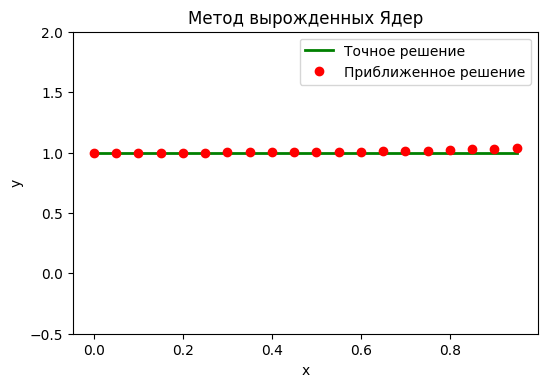

In [131]:
plt.plot(x, y, '-g', linewidth=2, label="Точное решение")
plt.plot(x, y_approx, 'or', linewidth=2, label="Приближенное решение")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.ylim([-0.5, 2])
plt.title("Метод вырожденных Ядер")

# Метод квадратур

Решим уравнение 11.3 пункт а методом квадратур

In [132]:
h = 0.05
a = 0
b = 1.001
lam = 1/2

In [133]:
x = np.arange(a, b, h)
x = x.reshape(len(x), 1)
n = len(x)

In [134]:
K = lambda x, s: (x*s)*lam
f = lambda x: (5/6)*x
y_exact = lambda x: x

In [135]:
y = []
for i in range(n):
    y.append([])
    y[i].append(y_exact(x[i]))
y = np.array(y).reshape(n, 1)

In [136]:
def Fred_2(K, f, a, b, h):
    x = np.arange(a, b, h)
    x = x.reshape(len(x), 1)
    n = len(x)
    wt = 1/2
    wj = 1
    A = np.zeros((n, n))
    
    for i in range(n):
        A[i][0] = -h * wt * K(x[i], x[0])
        for j in range(1, n-1, 1):
            A[i][j] = -h * wj * K(x[i], x[j])
        A[i][n-1] = -h * wt * K(x[i], x[n-1])
        A[i][i] = A[i][i] + 1
    B = np.zeros((n, 1))
    for j in range(n):
        B[j][0] = f(x[j])
    
    y = np.linalg.solve(A, B)
    return y

In [137]:
y_approx = Fred_2(K, f, a, b, h)

Text(0.5, 1.0, 'Метод квадратур')

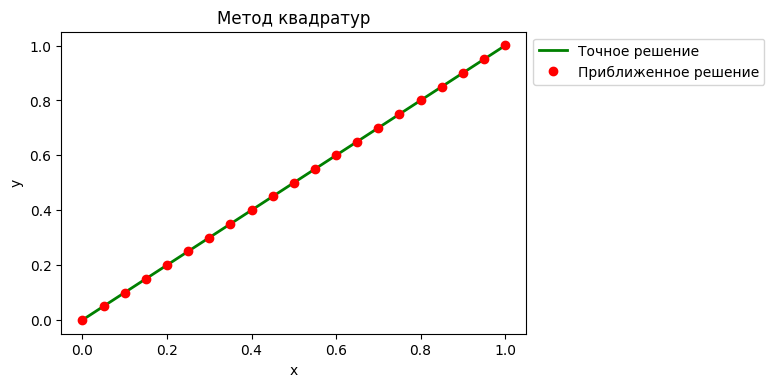

In [138]:
plt.plot(x, y, '-g', linewidth=2, label="Точное решение")
plt.plot(x, y_approx, 'or', label="Приближенное решение")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.title("Метод квадратур")

# Метод Галеркина-Петрова

In [139]:
a = -1.001
b = 1.001
h = 0.05
Lambda = 1
x = np.arange(a, b, h)

In [140]:
phi = [lambda t: t, lambda t: t*t]
psi = [lambda t: 1, lambda t: t]
f = lambda t: 1
y_exact = lambda t: 1 + 6 * t * t

K = lambda t, s: (t*t + t*s)
y = y_exact(x)

In [141]:
a_coef = []
for i in range(len(psi)):
    a_coef.append([])
    for j in range(len(phi)):
        a_coef[i].append(integrate.quad(lambda t: phi[i](t)*psi[j](t), a, b)[0]
        -Lambda*integrate.dblquad(lambda t,s: (psi[i](t)*K(t,s)*phi[j](s)), a, b, lambda t:a, lambda t:b)[0])

b_coef = []
for i in range(len(psi)):
    b_coef.append(Lambda*integrate.dblquad(lambda t,s: (psi[i](t)*K(t,s)*f(s)), a, b, lambda t:a, lambda t:b)[0])

c_coef = np.linalg.solve(np.asarray(a_coef), np.asarray(b_coef))

In [142]:
y_approx = 1 + c_coef[0] * phi[0](x) + c_coef[1]*phi[1](x)

Text(0.5, 1.0, 'Метод Галеркина-Петрова')

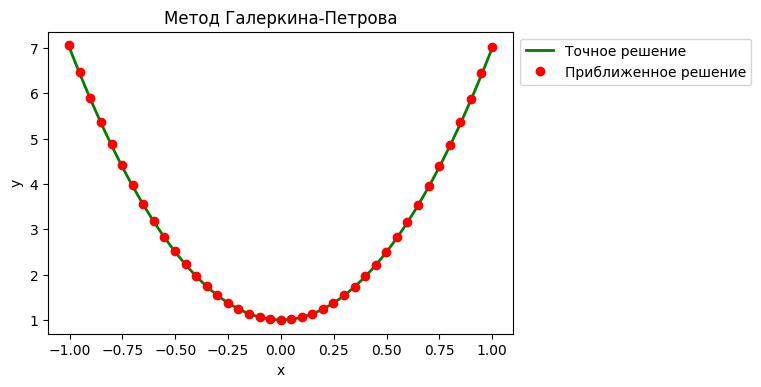

In [143]:
plt.plot(x, y, '-g', linewidth=2, label="Точное решение")
plt.plot(x, y_approx, 'or', label="Приближенное решение")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.title("Метод Галеркина-Петрова")

# Метод Бубнова-Галеркина

In [144]:
a_coef = []
for i in range(len(psi)):
    a_coef.append([])
    for j in range(len(phi)):
        a_coef[i].append(integrate.quad(lambda t: phi[i](t)*phi[j](t), a, b)[0]
        -Lambda*integrate.dblquad(lambda t,s: (phi[i](t)*K(t,s)*phi[j](s)), a, b, lambda t:a, lambda t:b)[0])

b_coef = []
for i in range(len(psi)):
    b_coef.append(Lambda*integrate.dblquad(lambda t,s: (phi[i](t)*K(t,s)*f(s)), a, b, lambda t:a, lambda t:b)[0])

c_coef = np.linalg.solve(np.asarray(a_coef), np.asarray(b_coef))

In [145]:
y_approx = 1 + c_coef[0] * phi[0](x) + c_coef[1]*phi[1](x)

Text(0.5, 1.0, 'Метод Бубнова-Галеркина')

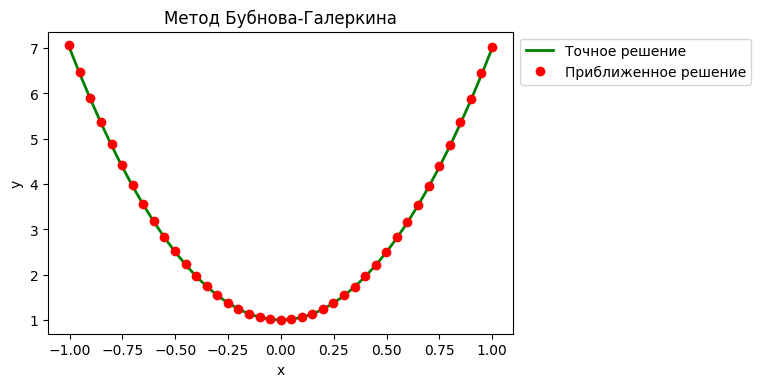

In [146]:
plt.plot(x, y, '-g', linewidth=2, label="Точное решение")
plt.plot(x, y_approx, 'or', label="Приближенное решение")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.title("Метод Бубнова-Галеркина")